# Machine Learning Engineer Nanodegree
## Model Evaluation & Validation
## Project 1: Predicting Boston Housing Prices

Welcome to the first project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been written. You will need to implement additional functionality to successfully answer all of the questions for this project. Unless it is requested, do not modify any of the code that has already been included. In this template code, there are four sections which you must complete to successfully produce a prediction with your model. Each section where you will write code is preceded by a **STEP X** header with comments describing what must be done. Please read the instructions carefully!

In addition to implementing code, there will be questions that you must answer that relate to the project and your implementation. Each section where you will answer a question is preceded by a **QUESTION X** header. Be sure that you have carefully read each question and provide thorough answers in the text boxes that begin with "**Answer:**". Your project submission will be evaluated based on your answers to each of the questions.  

A description of the dataset can be found [here](https://archive.ics.uci.edu/ml/datasets/Housing), which is provided by the **UCI Machine Learning Repository**.

# Getting Started
To familiarize yourself with an iPython Notebook, **try double clicking on this cell**. You will notice that the text changes so that all the formatting is removed. This allows you to make edits to the block of text you see here. This block of text (and mostly anything that's not code) is written using [Markdown](http://daringfireball.net/projects/markdown/syntax), which is a way to format text using headers, links, italics, and many other options! Whether you're editing a Markdown text block or a code block (like the one below), you can use the keyboard shortcut **Shift + Enter** or **Shift + Return** to execute the code or text block. In this case, it will show the formatted text.

The dataset for this project originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Housing). The Boston housing data was collected in 1978 and each of the 506 entries represent aggregated data about 14 features for homes from various suburbs in Boston, Massachusetts. For the purposes of this project, the following preprocessing steps have been made to the dataset:
- 16 data points have an `'MEDV'` value of 50.0. These data points likely contain **missing or censored values** and have been removed.
- 1 data point has an `'RM'` value of 8.78. This data point can be considered an **outlier** and has been removed.
- The features `'RM'`, `'LSTAT'`, `'PTRATIO'`, and `'MEDV'` are essential. The remaining **non-relevant features** have been excluded.
- The feature `'MEDV'` has been **multiplicatively scaled** to account for 35 years of market inflation.

Run the code cell below to load the Boston housing dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [138]:
# Importing a few necessary libraries
import numpy as np
import matplotlib.pyplot as pl
from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor

# Make matplotlib show our plots inline (nicely formatted in the notebook)
%matplotlib inline

# Load the Boston housing dataset
data = pd.read_csv('housing.csv')
prices = data['MEDV']
features = data.drop('MEDV', axis = 1)
    
# Success
print "Boston housing dataset has {} data points with {} variables each.".format(*data.shape)

Boston Housing dataset loaded successfully!


## Data Exploration
In this first section of this project, you will make a cursory investigation about the Boston housing data and provide your observations. Familiarizing yourself with the data through an explorative process is a fundamental practice to help you better understand and justify your results.

Since the main goal of this project is to construct a working model which has the capability of predicting the value of houses, we will need to separate the dataset into **features** and the **target variable**. The **features**, `'RM'`, `'LSTAT'`, and `'PTRATIO'`, give us quantitative information about each data point. The **target variable**, `'MEDV'`, will be the variable we seek to predict. These are stored in `features` and `prices`, respectively.

### Implementation: Calculate Statistics
For your very first coding implementation, you will calculate descriptive statistics about the Boston housing prices. Since `numpy` has already been imported for you, use this library to perform the necessary calculations. These statistics will be extremely important later on to analyze various prediction results from the constructed model.

In the code cell below, you will need to implement the following:
- Calculate the minimum, maximum, mean, median, and standard deviation of `'MEDV'`, which is stored in `prices`.
  - Store each calculation in their respective variable.

In [139]:
# Number of houses in the dataset
total_houses = housing_prices.size

# Number of features in the dataset
total_features = housing_features[0].size

# Minimum housing value in the dataset
minimum_price = np.min(housing_prices)

# Maximum housing value in the dataset
maximum_price = np.max(housing_prices)

# Mean house value of the dataset
mean_price = np.mean(housing_prices)

# Median house value of the dataset
median_price = np.median(housing_prices)

# Standard deviation of housing values of the dataset
std_dev = np.std(housing_prices)

# Show the calculated statistics
print "Boston Housing dataset statistics (in $1000's):\n"
print "Total number of houses:", total_houses
print "Total number of features:", total_features
print "Minimum house price:", minimum_price
print "Maximum house price:", maximum_price
print "Mean house price: {0:.3f}".format(mean_price)
print "Median house price:", median_price
print "Standard deviation of house price: {0:.3f}".format(std_dev)

Boston Housing dataset statistics (in $1000's):

Total number of houses: 506
Total number of features: 13
Minimum house price: 5.0
Maximum house price: 50.0
Mean house price: 22.533
Median house price: 21.2
Standard deviation of house price: 9.188


### Question 1 - Feature Observation
As a reminder, we are using three features from the Boston housing dataset: `'RM'`, `'LSTAT'`, and `'PTRATIO'`. For each data point (neighborhood):
- `'RM'` is the average number of rooms among homes in the neighborhood.
- `'LSTAT'` is the percentage of homeowners in the neighborhood considered "lower class" (working poor).
- `'PTRATIO'` is the ratio of students to teachers in primary and secondary schools in the neighborhood.

_Using your intuition, for each of the three features above, do you think that an increase in the value of that feature would lead to an **increase** in the value of `'MEDV'` or a **decrease** in the value of `'MEDV'`? Justify your answer for each._  
**Hint:** Would you expect a home that has an `'RM'` value of 6 be worth more or less than a home that has an `'RM'` value of 7?

**Answer: **
- CRIM: per capita crime rate by town 
    - I think this feature explain how safe that area.
- ZN: proportion of residential land zoned for lots over 25,000 sq.ft. 
    - May explain rich population.
- DIS: weighted distances to five Boston employment centres 
    - How par from office.

## Question 2
*Using your client's feature set `CLIENT_FEATURES`, which values correspond with the features you've chosen above?*  
**Hint: ** Run the code block below to see the client's data.

In [140]:
print CLIENT_FEATURES

[[11.95, 0.0, 18.1, 0, 0.659, 5.609, 90.0, 1.385, 24, 680.0, 20.2, 332.09, 12.13]]


**Answer: **
- CRIM : 11.95
- ZN : 0.0
- DIS : 1.385


1. CRIM: per capita crime rate by town  : 11.95
2. ZN: proportion of residential land zoned for lots over 25,000 sq.ft.  : 0.0
3. INDUS: proportion of non-retail business acres per town  : 18.1
4. CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)  : 0
5. NOX: nitric oxides concentration (parts per 10 million)  : 0.659
6. RM: average number of rooms per dwelling  : 5.609
7. AGE: proportion of owner-occupied units built prior to 1940 : 90.0
8. DIS: weighted distances to five Boston employment centres  : 1.385
9. RAD: index of accessibility to radial highways : 24
10. TAX: full-value property-tax rate per $10,000 : 680.0
11. PTRATIO: pupil-teacher ratio by town  : 20.2
12. B: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town : 332.09
13. LSTAT: % lower status of the population : 12.13


# Evaluating Model Performance
In this second section of the project, you will begin to develop the tools necessary for a model to make a prediction. Being able to accurately evaluate each model's performance through the use of these tools helps to greatly reinforce the confidence in your predictions.

## Step 2
In the code block below, you will need to implement code so that the `shuffle_split_data` function does the following:
- Randomly shuffle the input data `X` and target labels (housing values) `y`.
- Split the data into training and testing subsets, holding 30% of the data for testing.

If you use any functions not already acessible from the imported libraries above, remember to include your import statement below as well!   
Ensure that you have executed the code block once you are done. You'll know the `shuffle_split_data` function is working if the statement *"Successfully shuffled and split the data!"* is printed.

In [141]:
# Put any import statements you need for this code block here
from sklearn import cross_validation

def shuffle_split_data(X, y):
    """ Shuffles and splits data into 70% training and 30% testing subsets,
        then returns the training and testing subsets. """

    # Shuffle and split the data
    X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.3, random_state=0)

    # Return the training and testing data subsets
    return X_train, y_train, X_test, y_test


# Test shuffle_split_data
try:
    X_train, y_train, X_test, y_test = shuffle_split_data(housing_features, housing_prices)
    print "Successfully shuffled and split the data!"
except:
    print "Something went wrong with shuffling and splitting the data."

Successfully shuffled and split the data!


## Question 3
*Why do we split the data into training and testing subsets for our model?*

**Answer: **
- Because we need check prediction performance in general.
- By calculate prediction performance on unseen dataset(testing dataset), we can test on genearal case.

## Step 3
In the code block below, you will need to implement code so that the `performance_metric` function does the following:
- Perform a total error calculation between the true values of the `y` labels `y_true` and the predicted values of the `y` labels `y_predict`.

You will need to first choose an appropriate performance metric for this problem. See [the sklearn metrics documentation](http://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics) to view a list of available metric functions. **Hint: ** Look at the question below to see a list of the metrics that were covered in the supporting course for this project.

Once you have determined which metric you will use, remember to include the necessary import statement as well!  
Ensure that you have executed the code block once you are done. You'll know the `performance_metric` function is working if the statement *"Successfully performed a metric calculation!"* is printed.

In [142]:
# Put any import statements you need for this code block here
from sklearn.metrics import mean_absolute_error
def performance_metric(y_true, y_predict):
    """ Calculates and returns the total error between true and predicted values
        based on a performance metric chosen by the student. """

    error = mean_absolute_error(y_true, y_predict)
    return error


# Test performance_metric
try:
    total_error = performance_metric(y_train, y_train)
    print "Successfully performed a metric calculation!"
except:
    print "Something went wrong with performing a metric calculation."

Successfully performed a metric calculation!


## Question 4
*Which performance metric below did you find was most appropriate for predicting housing prices and analyzing the total error. Why?*
- *Accuracy*
- *Precision*
- *Recall*
- *F1 Score*
- *Mean Squared Error (MSE)*
- *Mean Absolute Error (MAE)*

**Answer: **
Housing price is regression problem. Not classification.
So, MSE or MAE is suitable.

- Error is defined as "predicted value - real value."
    - MAE : Mean Absolute Error is mean of absolute error.
    - MSE : Mean Squared Error is mean of squared error.

In Generally, at the same condition MSE result score is larger than MAE. Because MSE is squaring error value. 

So using MSE as performance metric, we can more penalty to error. So MSE converges fast than MAE.

But more penalty to error means more sensitive. One outlier can effect hugely. 

In MAE, outlier's error score is much smaller than MSE(because MSE's squaring). So compare with MSE, MAE is more robust to outliers. 

So i choose MAE.

## Step 4 (Final Step)
In the code block below, you will need to implement code so that the `fit_model` function does the following:
- Create a scoring function using the same performance metric as in **Step 3**. See the [sklearn `make_scorer` documentation](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html).
- Build a GridSearchCV object using `regressor`, `parameters`, and `scoring_function`. See the [sklearn documentation on GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.grid_search.GridSearchCV.html).

When building the scoring function and GridSearchCV object, *be sure that you read the parameters documentation thoroughly.* It is not always the case that a default parameter for a function is the appropriate setting for the problem you are working on.

Since you are using `sklearn` functions, remember to include the necessary import statements below as well!  
Ensure that you have executed the code block once you are done. You'll know the `fit_model` function is working if the statement *"Successfully fit a model to the data!"* is printed.

In [150]:
# Put any import statements you need for this code block
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import make_scorer
from sklearn.grid_search import GridSearchCV

def fit_model(X, y):
    """ Tunes a decision tree regressor model using GridSearchCV on the input data X 
        and target labels y and returns this optimal model. """

    # Create a decision tree regressor object
    regressor = DecisionTreeRegressor()

    # Set up the parameters we wish to tune
    parameters = {'max_depth':(1,2,3,4,5,6,7,8,9,10)}

    # Make an appropriate scoring function
    scoring_function = make_scorer(mean_absolute_error, greater_is_better=False)

    # Make the GridSearchCV object
    reg = GridSearchCV(regressor, param_grid=parameters, scoring=scoring_function)

    # Fit the learner to the data to obtain the optimal model with tuned parameters
    reg.fit(X, y)

    # Return the optimal model
    return reg.best_estimator_


# Test fit_model on entire dataset
try:
    reg = fit_model(housing_features, housing_prices)
    print "Successfully fit a model!"
except:
    print "Something went wrong with fitting a model."

Successfully fit a model!


## Question 5
*What is the grid search algorithm and when is it applicable?*

**Answer: ** 

Grid search is a method of find optimal parameters for specific machine learning algorithm. 

1. Input target parameters and target machine learning algorithm and score function.
2. Execute machine learning algorithm with that paramters.
3. Check result score. If best score, wrote that parameter.

By Iteration 1~3, grid search can select optimal parameters.


When grid search is applicable?

If we need parameter tuning under certain estimator(machine learning algorithm) and score function ans few parameter sets, we can use grid search. Grid search will find appropriate parameter from given few parameter sets.

## Question 6
*What is cross-validation, and how is it performed on a model? Why would cross-validation be helpful when using grid search?*

**Answer: ** 

K-Fold Cross Validation is divide whole dataset into equal sized k-bins. Use one of that bins as test set, other bins as train set. K times.

So when grid search, we can execute separate test K times. As result, more accurate parameter selecting is possible.

# Checkpoint!
You have now successfully completed your last code implementation section. Pat yourself on the back! All of your functions written above will be executed in the remaining sections below, and questions will be asked about various results for you to analyze. To prepare the **Analysis** and **Prediction** sections, you will need to intialize the two functions below. Remember, there's no need to implement any more code, so sit back and execute the code blocks! Some code comments are provided if you find yourself interested in the functionality.

In [151]:
def learning_curves(X_train, y_train, X_test, y_test):
    """ Calculates the performance of several models with varying sizes of training data.
        The learning and testing error rates for each model are then plotted. """
    
    print "Creating learning curve graphs for max_depths of 1, 3, 6, and 10. . ."
    
    # Create the figure window
    fig = pl.figure(figsize=(10,8))

    # We will vary the training set size so that we have 50 different sizes
    sizes = np.rint(np.linspace(1, len(X_train), 50)).astype(int)
    train_err = np.zeros(len(sizes))
    test_err = np.zeros(len(sizes))

    # Create four different models based on max_depth
    for k, depth in enumerate([1,3,6,10]):
        
        for i, s in enumerate(sizes):
            
            # Setup a decision tree regressor so that it learns a tree with max_depth = depth
            regressor = DecisionTreeRegressor(max_depth = depth)
            
            # Fit the learner to the training data
            regressor.fit(X_train[:s], y_train[:s])

            # Find the performance on the training set
            train_err[i] = performance_metric(y_train[:s], regressor.predict(X_train[:s]))
            
            # Find the performance on the testing set
            test_err[i] = performance_metric(y_test, regressor.predict(X_test))

        # Subplot the learning curve graph
        ax = fig.add_subplot(2, 2, k+1)
        ax.plot(sizes, test_err, lw = 2, label = 'Testing Error')
        ax.plot(sizes, train_err, lw = 2, label = 'Training Error')
        ax.legend()
        ax.set_title('max_depth = %s'%(depth))
        ax.set_xlabel('Number of Data Points in Training Set')
        ax.set_ylabel('Total Error')
        ax.set_xlim([0, len(X_train)])
    
    # Visual aesthetics
    fig.suptitle('Decision Tree Regressor Learning Performances', fontsize=18, y=1.03)
    fig.tight_layout()
    fig.show()

In [152]:
def model_complexity(X_train, y_train, X_test, y_test):
    """ Calculates the performance of the model as model complexity increases.
        The learning and testing errors rates are then plotted. """
    
    print "Creating a model complexity graph. . . "

    # We will vary the max_depth of a decision tree model from 1 to 14
    max_depth = np.arange(1, 14)
    train_err = np.zeros(len(max_depth))
    test_err = np.zeros(len(max_depth))

    for i, d in enumerate(max_depth):
        # Setup a Decision Tree Regressor so that it learns a tree with depth d
        regressor = DecisionTreeRegressor(max_depth = d)

        # Fit the learner to the training data
        regressor.fit(X_train, y_train)

        # Find the performance on the training set
        train_err[i] = performance_metric(y_train, regressor.predict(X_train))

        # Find the performance on the testing set
        test_err[i] = performance_metric(y_test, regressor.predict(X_test))

    # Plot the model complexity graph
    pl.figure(figsize=(7, 5))
    pl.title('Decision Tree Regressor Complexity Performance')
    pl.plot(max_depth, test_err, lw=2, label = 'Testing Error')
    pl.plot(max_depth, train_err, lw=2, label = 'Training Error')
    pl.legend()
    pl.xlabel('Maximum Depth')
    pl.ylabel('Total Error')
    pl.show()

# Analyzing Model Performance
In this third section of the project, you'll take a look at several models' learning and testing error rates on various subsets of training data. Additionally, you'll investigate one particular algorithm with an increasing `max_depth` parameter on the full training set to observe how model complexity affects learning and testing errors. Graphing your model's performance based on varying criteria can be beneficial in the analysis process, such as visualizing behavior that may not have been apparent from the results alone.

Creating learning curve graphs for max_depths of 1, 3, 6, and 10. . .


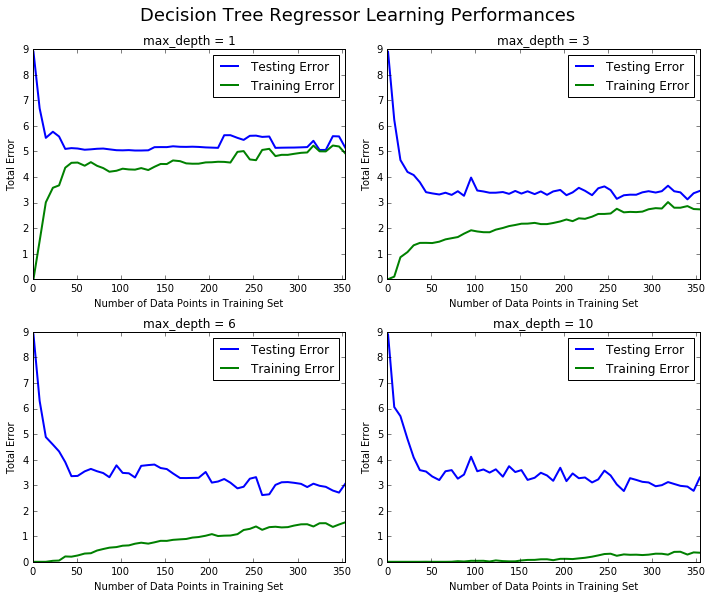

In [153]:
learning_curves(X_train, y_train, X_test, y_test)

## Question 7
*Choose one of the learning curve graphs that are created above. What is the max depth for the chosen model? As the size of the training set increases, what happens to the training error? What happens to the testing error?*

**Answer: **
I think max_depth=6 is best.

As the size of the training set increases,
1. training error is slightly increase. 
2. test error decrease.
    1. "Number of Data Points in Training Set" is 0~50 : test error decrease really fast.
    2. "Number of Data Points in Training Set" over 50 : test error slighty decrease.
3. and training error and test error are more closer.

max_depth = 1 is too hight test error compared with others.

max_depth = 3 is slightly high test error than max_depth = 6. So i ignored it.

max_depth = 10 also low test error.
And max_depth=10's traing error is too low. So i think this parameter case is overfitting.

## Question 8
*Look at the learning curve graphs for the model with a max depth of 1 and a max depth of 10. When the model is using the full training set, does it suffer from high bias or high variance when the max depth is 1? What about when the max depth is 10?*

**Answer: **

max depth : 1
It's underfitting. high bias.
As the size of the training set increases, test error is fixed at near 5.
Other parameters(3,6,10) case test error go down near 3.
So i think max_depth = 1 parameter can not represent appropriate complexity about this case.

max depth : 10
It's overfitting. high variance.
As the size of the training set increases, test error is fixed at near 3.
Compare with other parameter, near 20 test error is low enough. But training error is close to 0. This means this parameter too mush suitable about training dataset.

Creating a model complexity graph. . . 


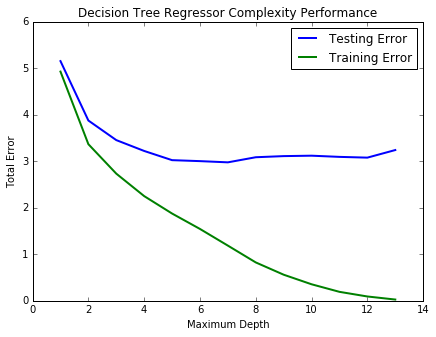

In [154]:
model_complexity(X_train, y_train, X_test, y_test)

## Question 9
*From the model complexity graph above, describe the training and testing errors as the max depth increases. Based on your interpretation of the graph, which max depth results in a model that best generalizes the dataset? Why?*

**Answer: **

Maximum depth 6.
Because testing error is minimum when maximum depth between 5 to 7. But difference in testing error is very small. So i select mean value.(5+6+7) / 2 = 6

As maximum depth increases, training eror is decrease. And more complex model can represent training dataset more accurately. 

As maximum depth increases, testing error is decrease when maximum depth is between 0, 7. But from maximum depth is 8 to end(in this graph, 13?), testing error is increase. It is because too complex model can't represent testing dataset appropriately(overfitting). So, the maximum depth value that minimize testing error(6) is best parameter.

# Model Prediction
In this final section of the project, you will make a prediction on the client's feature set using an optimized model from `fit_model`. When applying grid search along with cross-validation to optimize your model, it would typically be performed and validated on a training set and subsequently evaluated on a **dedicated test set**. In this project, the optimization below is performed on the *entire dataset* (as opposed to the training set you made above) due to the many outliers in the data. Using the entire dataset for training provides for a less volatile prediction at the expense of not testing your model's performance. 

*To answer the following questions, it is recommended that you run the code blocks several times and use the median or mean value of the results.*

## Question 10
*Using grid search on the entire dataset, what is the optimal `max_depth` parameter for your model? How does this result compare to your intial intuition?*  
**Hint: ** Run the code block below to see the max depth produced by your optimized model.

In [155]:
print "Final model has an optimal max_depth parameter of", reg.get_params()['max_depth']
reg = fit_model(housing_features, housing_prices)
print "Final model has an optimal max_depth parameter of", reg.get_params()['max_depth']
reg = fit_model(housing_features, housing_prices)
print "Final model has an optimal max_depth parameter of", reg.get_params()['max_depth']
reg = fit_model(housing_features, housing_prices)
print "Final model has an optimal max_depth parameter of", reg.get_params()['max_depth']

Final model has an optimal max_depth parameter of 6
Final model has an optimal max_depth parameter of 6
Final model has an optimal max_depth parameter of 4
Final model has an optimal max_depth parameter of 4


Best parameter is various whenever execute fit_model. So, i execute 100 times and mean that value.

In [156]:
bestParamList = []
for i in xrange(100):
    reg = fit_model(housing_features, housing_prices)
    bestParamList.append(reg.get_params()['max_depth'])

bestParam = round(np.mean(bestParamList))
print "Final model has an optimal max_depth parameter of", bestParam

Final model has an optimal max_depth parameter of 5.0


**Answer: ** 

*Using grid search on the entire dataset, what is the optimal `max_depth` parameter for your model?*  
5

*How does this result compare to your intial intuition?*  
By intuition, i think as `max_depth` increases, accuracy also will increases. But result is not. The optimal `max_depth` is 5. This result is because our model overfitting to train dataset. As increase `max_depth`, our model more fitted to train dataset. And as a result, that model's general accuracy fall down.

## Question 11
*With your parameter-tuned model, what is the best selling price for your client's home? How does this selling price compare to the basic statistics you calculated on the dataset?*  

**Hint: ** Run the code block below to have your parameter-tuned model make a prediction on the client's home.

In [157]:
sale_price = reg.predict(CLIENT_FEATURES)
print "Predicted value of client's home: {0:.3f}".format(sale_price[0])

Predicted value of client's home: 20.766


**Answer: ** 

Best selling price is 20.766.

This selling price similar to Mean house price(22.533) and Median house price(21.2).

## Question 12 (Final Question):
*In a few sentences, discuss whether you would use this model or not to predict the selling price of future clients' homes in the Greater Boston area.*

**Answer: **

I will not use this model to predict.
I think this model's error is too high.

Testing error is about 3 when max depth is 6.
It's about 13% of mean house price(22.533).

And in fitting model, we have some cheat in data. We use whole dataset in grid search. This dataset also include test dataset. Grid search is method of select optimal parameter for machine learning algorithm. But that selected parameter is "fit" to our test dataset. So if we want more accurate result, must fitting model with traing dataset only. Despite of cheat, result accuracy is bad.